# **Meningkatkan Omzet Ecommerce Berdasarkan Karakteristik Konsumen**

Dikerjakan oleh: **Eriyawan**

**Project Overview**

**Latar Belakang**

Project ini bertujuan:
* mengetahui karakteristik konsumen ecommerce melalui clusterring  
* mendapatkan gambaran bagaimana untuk meningkatkan omzet melalui pendekatan karakteristik konsumen

Sumber data yang digunakan berasal dari Kaggle dengan link sebagai berikut:

https://www.kaggle.com/datasets/mmohaiminulislam/ecommerce-data-analysis


### **Persiapan**

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [138]:
!pip install factor_analyzer
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

### **Load Data**

In [139]:
df_fact = pd.read_csv("/content/drive/MyDrive/Berbagi/Dibimbing/_Finpro_ERIYAWAN/data/fact_table.csv", low_memory=False)
df_item = pd.read_csv("/content/drive/MyDrive/Berbagi/Dibimbing/_Finpro_ERIYAWAN/data/item_dim.csv", encoding = "ISO-8859-1")
df_store = pd.read_csv("/content/drive/MyDrive/Berbagi/Dibimbing/_Finpro_ERIYAWAN/data/store_dim.csv")
df_time = pd.read_csv("/content/drive/MyDrive/Berbagi/Dibimbing/_Finpro_ERIYAWAN/data/time_dim.csv")
df_trans = pd.read_csv("/content/drive/MyDrive/Berbagi/Dibimbing/_Finpro_ERIYAWAN/data/Trans_dim.csv")
df_customer = pd.read_csv("/content/drive/MyDrive/Berbagi/Dibimbing/_Finpro_ERIYAWAN/data/customer_dim.csv", encoding = "ISO-8859-1")

**Fact File**

In [140]:
df_fact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   payment_key    1000000 non-null  object 
 1   coustomer_key  1000000 non-null  object 
 2   time_key       1000000 non-null  object 
 3   item_key       1000000 non-null  object 
 4   store_key      1000000 non-null  object 
 5   quantity       1000000 non-null  int64  
 6   unit           996277 non-null   object 
 7   unit_price     1000000 non-null  float64
 8   total_price    1000000 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 68.7+ MB


In [141]:
df_fact.isna().sum()

payment_key         0
coustomer_key       0
time_key            0
item_key            0
store_key           0
quantity            0
unit             3723
unit_price          0
total_price         0
dtype: int64

Dari info diatas, hanya ada satu kolom yang kosong, yaitu kolom unit. Dan ini bisa diabaikan dalam project ini.

In [142]:
pd.set_option('display.max_columns', None)

In [143]:
df_fact.head()

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price
0,P026,C004510,T049189,I00177,S00307,1,ct,35.0,35.0
1,P022,C008967,T041209,I00248,S00595,1,rolls,26.0,26.0
2,P030,C007261,T03633,I00195,S00496,8,ct,12.5,100.0
3,P032,C007048,T084631,I00131,S0086,8,ct,14.0,112.0
4,P014,C006430,T071276,I00050,S00488,8,cans,8.0,64.0


In [144]:
df_fact.describe()

,quantity,unit_price,total_price
count,1000000.000000,1000000.000000,1000000.000000
mean,6.000185,17.561602,105.401436
std,3.161932,8.637097,80.829301
min,1.000000,6.000000,6.000000
25%,3.000000,13.000000,47.250000
50%,6.000000,16.000000,90.000000
75%,9.000000,20.000000,144.000000
max,11.000000,55.000000,605.000000


In [145]:
df_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   item_key     264 non-null    object 
 1   item_name    264 non-null    object 
 2   desc         264 non-null    object 
 3   unit_price   264 non-null    float64
 4   man_country  264 non-null    object 
 5   supplier     264 non-null    object 
 6   unit         263 non-null    object 
dtypes: float64(1), object(6)
memory usage: 14.6+ KB


In [146]:
df_item.head()

,item_key,item_name,desc,unit_price,man_country,supplier,unit
0,I00001,A&W Root Beer - 12 oz cans,a. Beverage - Soda,11.50,Netherlands,Bolsius Boxmeer,cans
1,I00002,A&W Root Beer Diet - 12 oz cans,a. Beverage - Soda,6.75,poland,CHROMADURLIN S.A.S,cans
2,I00003,Barq's Root Beer - 12 oz cans,a. Beverage - Soda,6.75,Bangladesh,DENIMACH LTD,cans
3,I00004,Cherry Coke 12oz,a. Beverage - Soda,6.75,Netherlands,Bolsius Boxmeer,cans
4,I00005,Cherry Coke Zero 12 pack,a. Beverage - Soda,6.75,Finland,HARDFORD AB,cans


In [147]:
df_item['desc'].describe()

count                    264
unique                    30
top       a. Beverage - Soda
freq                      29
Name: desc, dtype: object

In [148]:
df_item['desc'].unique()

array(['a. Beverage - Soda', 'a. Beverage Sparkling Water',
       'Beverage - Energy/Protein ', 'Beverage - Energy/Protein',
       'Beverage - Gatorade', 'Beverage - Iced Tea', 'Beverage - Juice',
       'Beverage Water', 'Coffee Cream', 'Coffee Creamer',
       'Coffee Ground', 'Coffee Hot Cocoa', 'Coffee K-Cups',
       'Coffee K-Cups Tea', 'Coffee Stirrers', 'Coffee Sweetener',
       'Dishware - Bowls', 'Dishware - Cups Cold', 'Dishware - Cups Hot',
       'Dishware - Plates', 'Dishware - Utensils', 'Food - Chips',
       'Food - Chocolate', 'Food - Healthy', 'Food - Nuts',
       'Food - Snacks', 'Food - Sweets', 'Gum - Mints',
       'Kitchen Supplies', 'Medicine'], dtype=object)

Dari data diatas, tampak bahwa dataset ini hanya mencatat penjualan produk minuman dan makanan ringan, serta obat.

In [149]:
xitem = df_item.groupby(by='desc', as_index=False).agg(jumlah=('desc', 'count'))
xitem.head()

,desc,jumlah
0,Beverage - Energy/Protein,13
1,Beverage - Energy/Protein,1
2,Beverage - Gatorade,10
3,Beverage - Iced Tea,7
4,Beverage - Juice,7


<Axes: xlabel='jumlah', ylabel='desc'>

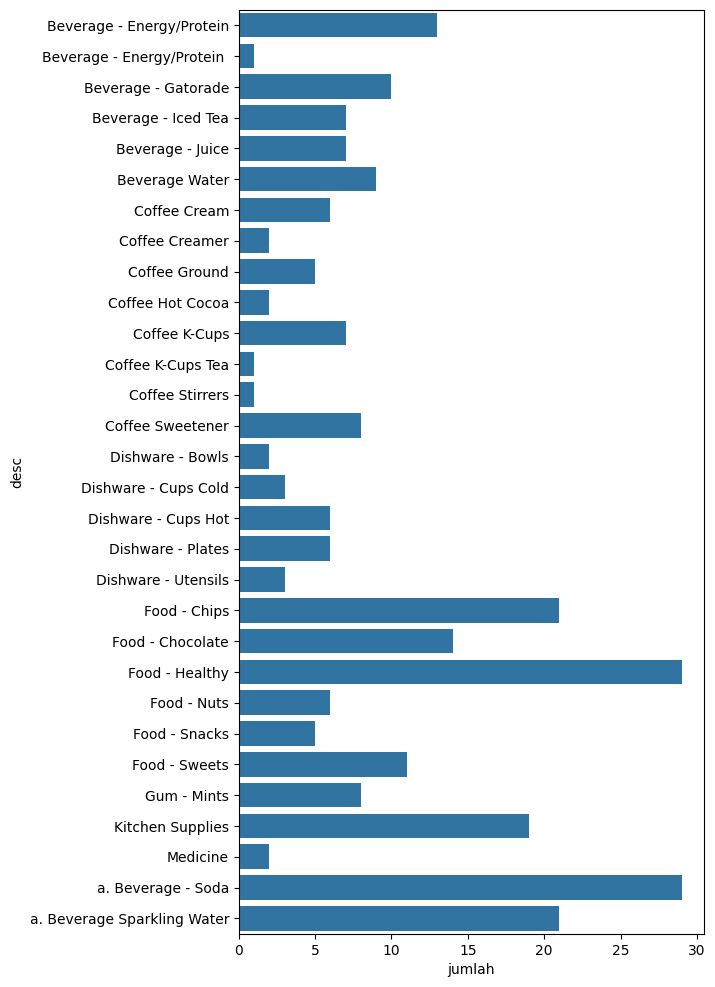

In [150]:
plt.figure(figsize=(6,12))
sns.barplot(xitem, x="jumlah", y="desc")

In [151]:
xitemasal = df_item.groupby(by=['supplier','man_country'], as_index=False).agg(jumlah=('desc', 'count'))
xitemasal

,supplier,man_country,jumlah
0,BIGSO AB,Lithuania,26
1,Bolsius Boxmeer,Netherlands,26
2,"CHERRY GROUP CO.,LTD",China,16
3,CHROMADURLIN S.A.S,poland,28
4,DENIMACH LTD,Bangladesh,34
5,Friedola 1888 GmbH,Germany,31
6,HARDFORD AB,Finland,27
7,Indo Count Industries Ltd,India,32
8,MAESA SAS,United States,20
9,NINGBO SEDUNO IMP & EXP CO.LTD,Cambodia,24


<Axes: xlabel='jumlah', ylabel='man_country'>

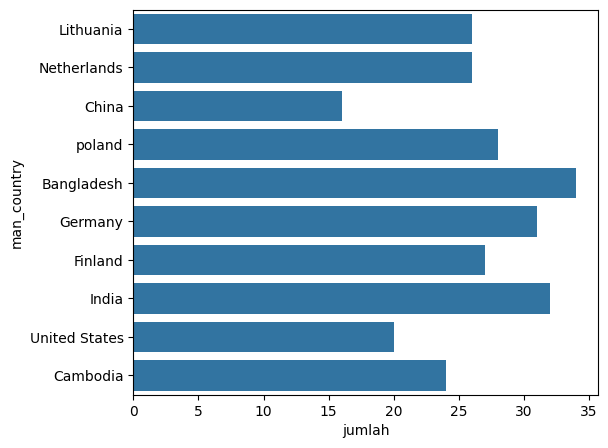

In [152]:
plt.figure(figsize=(6,5))
sns.barplot(xitemasal, x="jumlah", y="man_country")

In [153]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_key  726 non-null    object
 1   division   726 non-null    object
 2   district   726 non-null    object
 3   upazila    726 non-null    object
dtypes: object(4)
memory usage: 22.8+ KB


In [154]:
df_store.head()

,store_key,division,district,upazila
0,S0001,SYLHET,HABIGANJ,AJMIRIGANJ
1,S0002,SYLHET,HABIGANJ,BAHUBAL
2,S0003,SYLHET,HABIGANJ,BANIACHONG
3,S0004,SYLHET,HABIGANJ,CHUNARUGHAT
4,S0005,SYLHET,HABIGANJ,HABIGANJ SADAR


In [155]:
xstore = df_store.groupby(by='district', as_index=False).agg(jumlah=('district', 'count'))
xstore

,district,jumlah
0,BAGERHAT,9
1,BANDARBAN,7
2,BARGUNA,6
3,BARISAL,20
4,BHOLA,7
...,...,...
59,SIRAJGANJ,9
60,SUNAMGANJ,11
61,SYLHET,12
62,TANGAIL,12


<Axes: xlabel='jumlah', ylabel='district'>

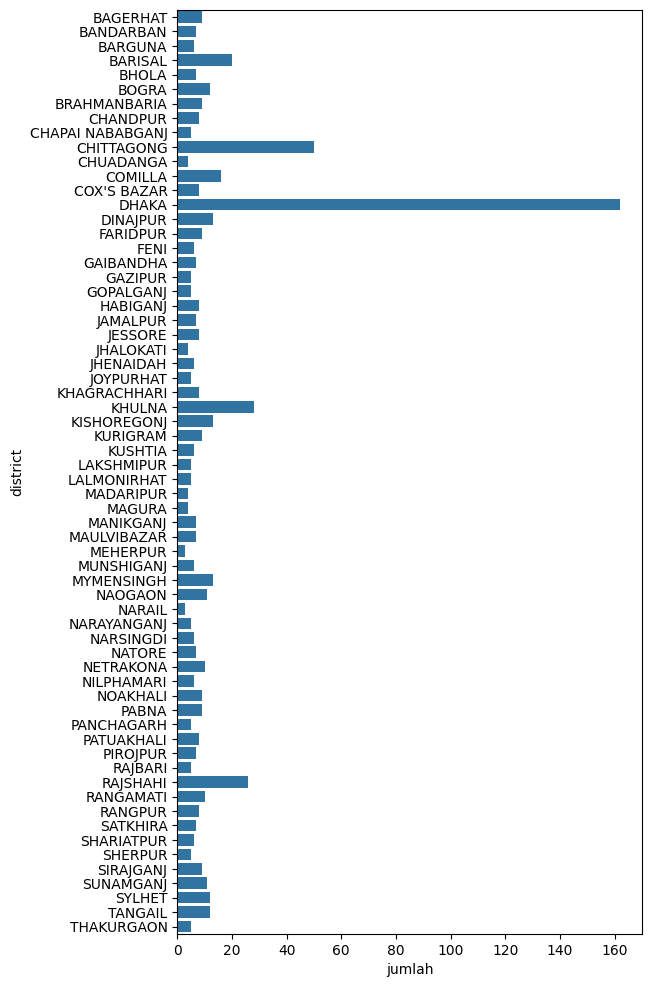

In [156]:
plt.figure(figsize=(6,12))
sns.barplot(xstore, x="jumlah", y="district")

In [157]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   payment_key  39 non-null     object
 1   trans_type   39 non-null     object
 2   bank_name    39 non-null     object
dtypes: object(3)
memory usage: 1.0+ KB


In [158]:
df_trans.head()

,payment_key,trans_type,bank_name
0,P001,cash,None
1,P002,card,AB Bank Limited
2,P003,card,Bangladesh Commerce Bank Limited
3,P004,card,Bank Asia Limited
4,P005,card,BRAC Bank Limited


In [159]:
xtrans = df_trans.groupby(by='trans_type', as_index=False).agg(jumlah=('trans_type', 'count'))
xtrans

,trans_type,jumlah
0,card,35
1,cash,1
2,mobile,3


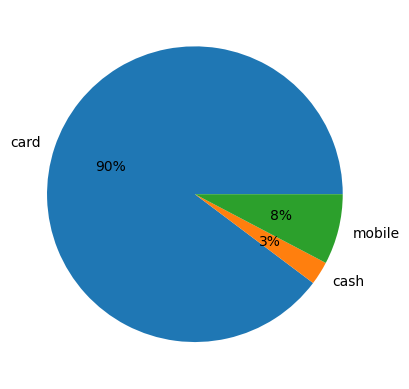

In [160]:
data = xtrans["jumlah"]
labels = xtrans["trans_type"]

plt.pie(data, labels = labels, autopct='%.0f%%')
plt.show()

In [161]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9191 entries, 0 to 9190
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   coustomer_key  9191 non-null   object
 1   name           9164 non-null   object
 2   contact_no     9191 non-null   int64 
 3   nid            9191 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 287.3+ KB


In [162]:
df_customer.isna().sum()

coustomer_key     0
name             27
contact_no        0
nid               0
dtype: int64

Terdapat 27 data customer (dari 9164 data) tanpa nama, dan ini bisa diabaikan.

In [163]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   time_key  99999 non-null  object
 1   date      99999 non-null  object
 2   hour      99999 non-null  int64 
 3   day       99999 non-null  int64 
 4   week      99999 non-null  object
 5   month     99999 non-null  int64 
 6   quarter   99999 non-null  object
 7   year      99999 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 6.1+ MB


In [164]:
df_time.head()

,time_key,date,hour,day,week,month,quarter,year
0,T00001,20-05-2017 14:56,14,20,3rd Week,5,Q2,2017
1,T00002,30-01-2015 22:14,22,30,4th Week,1,Q1,2015
2,T00003,14-03-2020 02:34,2,14,2nd Week,3,Q1,2020
3,T00004,27-04-2018 12:19,12,27,4th Week,4,Q2,2018
4,T00005,14-04-2018 10:43,10,14,2nd Week,4,Q2,2018


### **Data Cleaning dan Joining Tables**

**tabel Fact dan Item**

In [165]:
df_fact.duplicated().sum()

0

In [166]:
df_fact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   payment_key    1000000 non-null  object 
 1   coustomer_key  1000000 non-null  object 
 2   time_key       1000000 non-null  object 
 3   item_key       1000000 non-null  object 
 4   store_key      1000000 non-null  object 
 5   quantity       1000000 non-null  int64  
 6   unit           996277 non-null   object 
 7   unit_price     1000000 non-null  float64
 8   total_price    1000000 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 68.7+ MB


In [167]:
df_item.duplicated().sum()

0

In [168]:
df_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   item_key     264 non-null    object 
 1   item_name    264 non-null    object 
 2   desc         264 non-null    object 
 3   unit_price   264 non-null    float64
 4   man_country  264 non-null    object 
 5   supplier     264 non-null    object 
 6   unit         263 non-null    object 
dtypes: float64(1), object(6)
memory usage: 14.6+ KB


In [169]:
df_all = pd.merge(df_fact, df_item, on='item_key', how='inner')
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 15 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   payment_key    1000000 non-null  object 
 1   coustomer_key  1000000 non-null  object 
 2   time_key       1000000 non-null  object 
 3   item_key       1000000 non-null  object 
 4   store_key      1000000 non-null  object 
 5   quantity       1000000 non-null  int64  
 6   unit_x         996277 non-null   object 
 7   unit_price_x   1000000 non-null  float64
 8   total_price    1000000 non-null  float64
 9   item_name      1000000 non-null  object 
 10  desc           1000000 non-null  object 
 11  unit_price_y   1000000 non-null  float64
 12  man_country    1000000 non-null  object 
 13  supplier       1000000 non-null  object 
 14  unit_y         996277 non-null   object 
dtypes: float64(3), int64(1), object(11)
memory usage: 122.1+ MB


terdapat dua kolom unit dan unit_price sehingga perlu dibuang salah satunya, pastikan dulu isinya sama

In [170]:
df_all[df_all["unit_price_x"] != df_all["unit_price_y"]]

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit_x,unit_price_x,total_price,item_name,desc,unit_price_y,man_country,supplier,unit_y


tidak ada data yang memiliki nilai berbeda antara kolom unit_price_x dan unit_price_y, maka unit_price_y dihapus saja, dan nama kolom unit_price_x dikembalikan menjadi unit_price_x

In [171]:
df_all = df_all.drop(['unit_price_y'], axis=1)
df_all = df_all.rename(columns={"unit_price_x": "unit_price"}, errors="raise")
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 14 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   payment_key    1000000 non-null  object 
 1   coustomer_key  1000000 non-null  object 
 2   time_key       1000000 non-null  object 
 3   item_key       1000000 non-null  object 
 4   store_key      1000000 non-null  object 
 5   quantity       1000000 non-null  int64  
 6   unit_x         996277 non-null   object 
 7   unit_price     1000000 non-null  float64
 8   total_price    1000000 non-null  float64
 9   item_name      1000000 non-null  object 
 10  desc           1000000 non-null  object 
 11  man_country    1000000 non-null  object 
 12  supplier       1000000 non-null  object 
 13  unit_y         996277 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 114.4+ MB


In [172]:
df_all[df_all["unit_x"] != df_all["unit_y"]]

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit_x,unit_price,total_price,item_name,desc,man_country,supplier,unit_y
776703,P030,C001653,T053668,I00158,S00327,1,NaN,17.0,17.0,Frito Bold Flavors Variety,Food - Chips,Lithuania,BIGSO AB,NaN
776704,P013,C008861,T036513,I00158,S00280,9,NaN,17.0,153.0,Frito Bold Flavors Variety,Food - Chips,Lithuania,BIGSO AB,NaN
776705,P007,C008864,T052262,I00158,S00308,7,NaN,17.0,119.0,Frito Bold Flavors Variety,Food - Chips,Lithuania,BIGSO AB,NaN
776706,P037,C002870,T050819,I00158,S00506,7,NaN,17.0,119.0,Frito Bold Flavors Variety,Food - Chips,Lithuania,BIGSO AB,NaN
776707,P020,C003666,T094595,I00158,S0077,11,NaN,17.0,187.0,Frito Bold Flavors Variety,Food - Chips,Lithuania,BIGSO AB,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780421,P016,C007003,T04678,I00158,S00522,1,NaN,17.0,17.0,Frito Bold Flavors Variety,Food - Chips,Lithuania,BIGSO AB,NaN
780422,P039,C004215,T022792,I00158,S0092,9,NaN,17.0,153.0,Frito Bold Flavors Variety,Food - Chips,Lithuania,BIGSO AB,NaN
780423,P027,C000309,T07076,I00158,S00550,9,NaN,17.0,153.0,Frito Bold Flavors Variety,Food - Chips,Lithuania,BIGSO AB,NaN
780424,P033,C008559,T070336,I00158,S00553,11,NaN,17.0,187.0,Frito Bold Flavors Variety,Food - Chips,Lithuania,BIGSO AB,NaN


Terdapat perbedaan nilai kolom unit. nilai yang digunakan adalah nilai yang berasal dari tabel fact, dan abaikan kolom dari tabel item.

dengan demikian kolom unit_y dibuang, dan unit_x dikembalikan nama kolomnya menjadi unit.

In [173]:
df_all = df_all.drop(['unit_y'], axis=1)
df_all = df_all.rename(columns={"unit_x": "unit"}, errors="raise")
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   payment_key    1000000 non-null  object 
 1   coustomer_key  1000000 non-null  object 
 2   time_key       1000000 non-null  object 
 3   item_key       1000000 non-null  object 
 4   store_key      1000000 non-null  object 
 5   quantity       1000000 non-null  int64  
 6   unit           996277 non-null   object 
 7   unit_price     1000000 non-null  float64
 8   total_price    1000000 non-null  float64
 9   item_name      1000000 non-null  object 
 10  desc           1000000 non-null  object 
 11  man_country    1000000 non-null  object 
 12  supplier       1000000 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 106.8+ MB


kolom item_key sudah tidak diperlukan lagi, maka bisa dibuang.

In [174]:
df_all = df_all.drop(['item_key'], axis=1)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   payment_key    1000000 non-null  object 
 1   coustomer_key  1000000 non-null  object 
 2   time_key       1000000 non-null  object 
 3   store_key      1000000 non-null  object 
 4   quantity       1000000 non-null  int64  
 5   unit           996277 non-null   object 
 6   unit_price     1000000 non-null  float64
 7   total_price    1000000 non-null  float64
 8   item_name      1000000 non-null  object 
 9   desc           1000000 non-null  object 
 10  man_country    1000000 non-null  object 
 11  supplier       1000000 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 99.2+ MB


**store**

In [175]:
df_store.duplicated().sum()

0

In [176]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_key  726 non-null    object
 1   division   726 non-null    object
 2   district   726 non-null    object
 3   upazila    726 non-null    object
dtypes: object(4)
memory usage: 22.8+ KB


In [177]:
df_all = pd.merge(df_all, df_store, on='store_key', how='inner')
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 15 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   payment_key    1000000 non-null  object 
 1   coustomer_key  1000000 non-null  object 
 2   time_key       1000000 non-null  object 
 3   store_key      1000000 non-null  object 
 4   quantity       1000000 non-null  int64  
 5   unit           996277 non-null   object 
 6   unit_price     1000000 non-null  float64
 7   total_price    1000000 non-null  float64
 8   item_name      1000000 non-null  object 
 9   desc           1000000 non-null  object 
 10  man_country    1000000 non-null  object 
 11  supplier       1000000 non-null  object 
 12  division       1000000 non-null  object 
 13  district       1000000 non-null  object 
 14  upazila        1000000 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 122.1+ MB


merging aman. kolom store_key dapat dibuang

In [178]:
df_all = df_all.drop(['store_key'], axis=1)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 14 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   payment_key    1000000 non-null  object 
 1   coustomer_key  1000000 non-null  object 
 2   time_key       1000000 non-null  object 
 3   quantity       1000000 non-null  int64  
 4   unit           996277 non-null   object 
 5   unit_price     1000000 non-null  float64
 6   total_price    1000000 non-null  float64
 7   item_name      1000000 non-null  object 
 8   desc           1000000 non-null  object 
 9   man_country    1000000 non-null  object 
 10  supplier       1000000 non-null  object 
 11  division       1000000 non-null  object 
 12  district       1000000 non-null  object 
 13  upazila        1000000 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 114.4+ MB


**Trans**

In [179]:
df_trans.duplicated().sum()

0

In [180]:
df_all = pd.merge(df_all, df_trans, on='payment_key', how='inner')
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 16 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   payment_key    1000000 non-null  object 
 1   coustomer_key  1000000 non-null  object 
 2   time_key       1000000 non-null  object 
 3   quantity       1000000 non-null  int64  
 4   unit           996277 non-null   object 
 5   unit_price     1000000 non-null  float64
 6   total_price    1000000 non-null  float64
 7   item_name      1000000 non-null  object 
 8   desc           1000000 non-null  object 
 9   man_country    1000000 non-null  object 
 10  supplier       1000000 non-null  object 
 11  division       1000000 non-null  object 
 12  district       1000000 non-null  object 
 13  upazila        1000000 non-null  object 
 14  trans_type     1000000 non-null  object 
 15  bank_name      1000000 non-null  object 
dtypes: float64(2), int64(1), object(13)
memory usage: 129.7

merging aman. kolom payment_key dapat dibuang.

In [181]:
df_all = df_all.drop(['payment_key'], axis=1)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 15 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   coustomer_key  1000000 non-null  object 
 1   time_key       1000000 non-null  object 
 2   quantity       1000000 non-null  int64  
 3   unit           996277 non-null   object 
 4   unit_price     1000000 non-null  float64
 5   total_price    1000000 non-null  float64
 6   item_name      1000000 non-null  object 
 7   desc           1000000 non-null  object 
 8   man_country    1000000 non-null  object 
 9   supplier       1000000 non-null  object 
 10  division       1000000 non-null  object 
 11  district       1000000 non-null  object 
 12  upazila        1000000 non-null  object 
 13  trans_type     1000000 non-null  object 
 14  bank_name      1000000 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 122.1+ MB


In [182]:
xtrans = df_all.groupby(by='trans_type', as_index=False).agg(jumlah=('trans_type', 'count'))
xtrans

,trans_type,jumlah
0,card,897319
1,cash,25590
2,mobile,77091


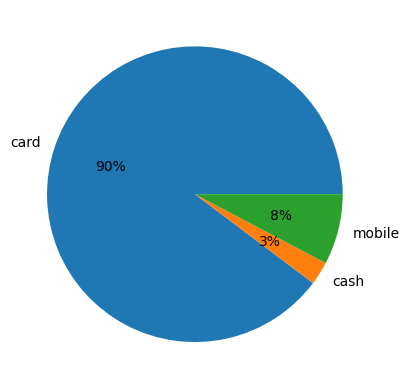

In [183]:
data = xtrans["jumlah"]
labels = xtrans["trans_type"]

plt.pie(data, labels = labels, autopct='%.0f%%')
plt.show()

**Customer**

In [184]:
df_customer.duplicated().sum()

0

In [185]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9191 entries, 0 to 9190
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   coustomer_key  9191 non-null   object
 1   name           9164 non-null   object
 2   contact_no     9191 non-null   int64 
 3   nid            9191 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 287.3+ KB


In [186]:
df_all = pd.merge(df_all, df_customer, on='coustomer_key', how='inner')
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 18 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   coustomer_key  1000000 non-null  object 
 1   time_key       1000000 non-null  object 
 2   quantity       1000000 non-null  int64  
 3   unit           996277 non-null   object 
 4   unit_price     1000000 non-null  float64
 5   total_price    1000000 non-null  float64
 6   item_name      1000000 non-null  object 
 7   desc           1000000 non-null  object 
 8   man_country    1000000 non-null  object 
 9   supplier       1000000 non-null  object 
 10  division       1000000 non-null  object 
 11  district       1000000 non-null  object 
 12  upazila        1000000 non-null  object 
 13  trans_type     1000000 non-null  object 
 14  bank_name      1000000 non-null  object 
 15  name           997010 non-null   object 
 16  contact_no     1000000 non-null  int64  
 17  nid      

merging aman, kolom customer dapat dibuang, namun karena tujuan akhir terkait customer, maka kolom ini akan diperlukan, sehingga tidak perlu dibuang.



**Time**

In [187]:
df_time.duplicated().sum()

0

In [188]:
df_all = pd.merge(df_all, df_time, on='time_key', how='inner')
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 25 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   coustomer_key  1000000 non-null  object 
 1   time_key       1000000 non-null  object 
 2   quantity       1000000 non-null  int64  
 3   unit           996277 non-null   object 
 4   unit_price     1000000 non-null  float64
 5   total_price    1000000 non-null  float64
 6   item_name      1000000 non-null  object 
 7   desc           1000000 non-null  object 
 8   man_country    1000000 non-null  object 
 9   supplier       1000000 non-null  object 
 10  division       1000000 non-null  object 
 11  district       1000000 non-null  object 
 12  upazila        1000000 non-null  object 
 13  trans_type     1000000 non-null  object 
 14  bank_name      1000000 non-null  object 
 15  name           997010 non-null   object 
 16  contact_no     1000000 non-null  int64  
 17  nid      

merging aman. kolom time_key dapat dibuang.

In [189]:
df_all = df_all.drop(['time_key'], axis=1)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 24 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   coustomer_key  1000000 non-null  object 
 1   quantity       1000000 non-null  int64  
 2   unit           996277 non-null   object 
 3   unit_price     1000000 non-null  float64
 4   total_price    1000000 non-null  float64
 5   item_name      1000000 non-null  object 
 6   desc           1000000 non-null  object 
 7   man_country    1000000 non-null  object 
 8   supplier       1000000 non-null  object 
 9   division       1000000 non-null  object 
 10  district       1000000 non-null  object 
 11  upazila        1000000 non-null  object 
 12  trans_type     1000000 non-null  object 
 13  bank_name      1000000 non-null  object 
 14  name           997010 non-null   object 
 15  contact_no     1000000 non-null  int64  
 16  nid            1000000 non-null  int64  
 17  date     

Data tanggal masih dalam bentuk object dan belum dalam ebntuk tangal, maka perlu ditambahkan satu kolom yang berupa tanggal untuk bisa ditampilkan histogram waktunya.

In [190]:
df_all['date_date'] = df_all['date'].apply(lambda x: (datetime.strptime(x, "%d-%m-%Y %H:%M")))

<Axes: xlabel='date_date', ylabel='Count'>

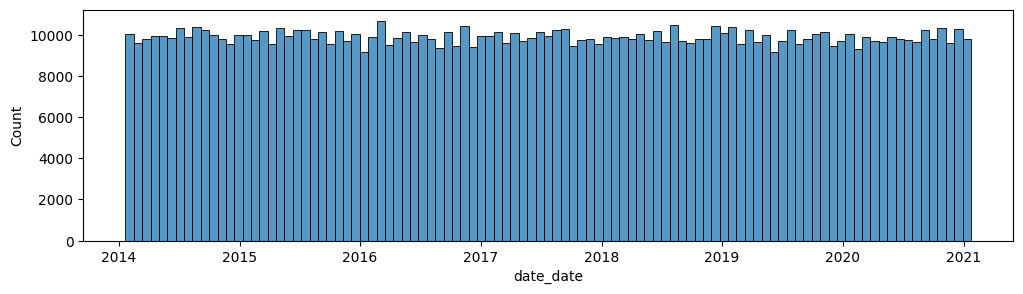

In [191]:
plt.figure(figsize=(12,3))
sns.histplot(data=df_all, x='date_date')

### **Visualisasi**

In [192]:
all_nums = ["quantity","unit_price","total_price"]
all_cats = ["item_name","man_country","supplier","division","district","date","hour","day","week","month","quarter","year","trans_type"]

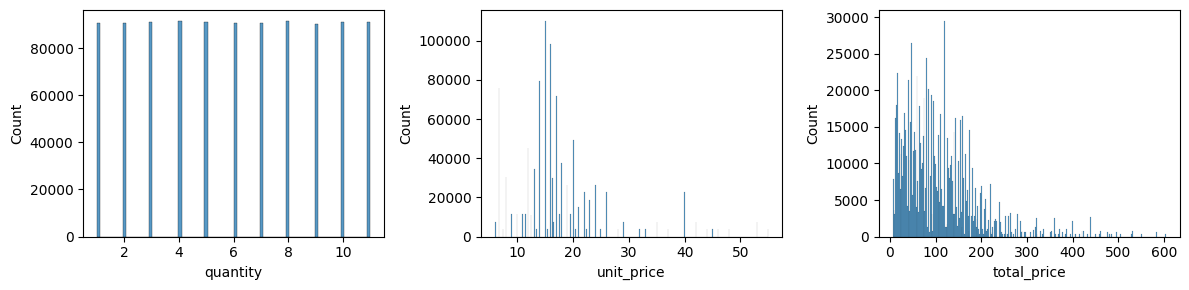

In [193]:
plt.figure(figsize=(12,3))

features = [i for i in all_nums]
for i in range(0, len(features)):
    plt.subplot(1, 3, i+1)
    sns.histplot(data=df_all, x=features[i])
    plt.tight_layout()

Yang menarik adalah chart quantity yang relatif rata, mungkin penjual memiliki aturan jumlah minimal maximal dalam setiap transaksi.


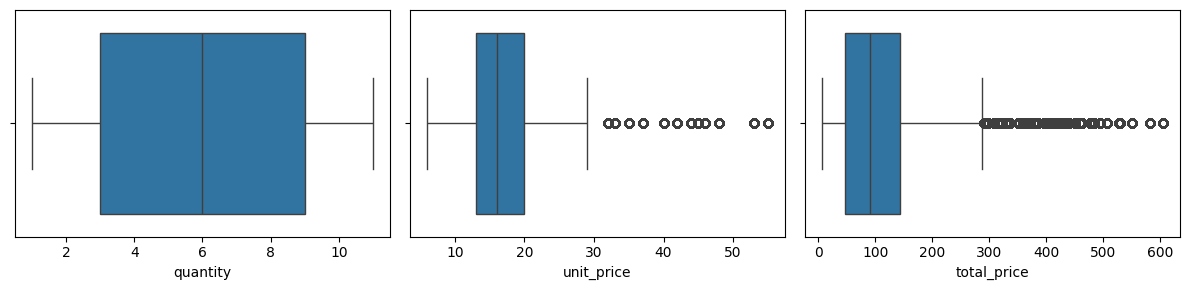

In [194]:
plt.figure(figsize=(12,3))

features = [i for i in all_nums]
for i in range(0, len(features)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df_all, x=features[i])
    plt.tight_layout()

Boxplot quantity juga meyakinkan bahwa quantity transaksi sangat teratur.


In [195]:
check_cats = ["man_country","supplier","division","trans_type","hour","day","week","month","quarter","year"]

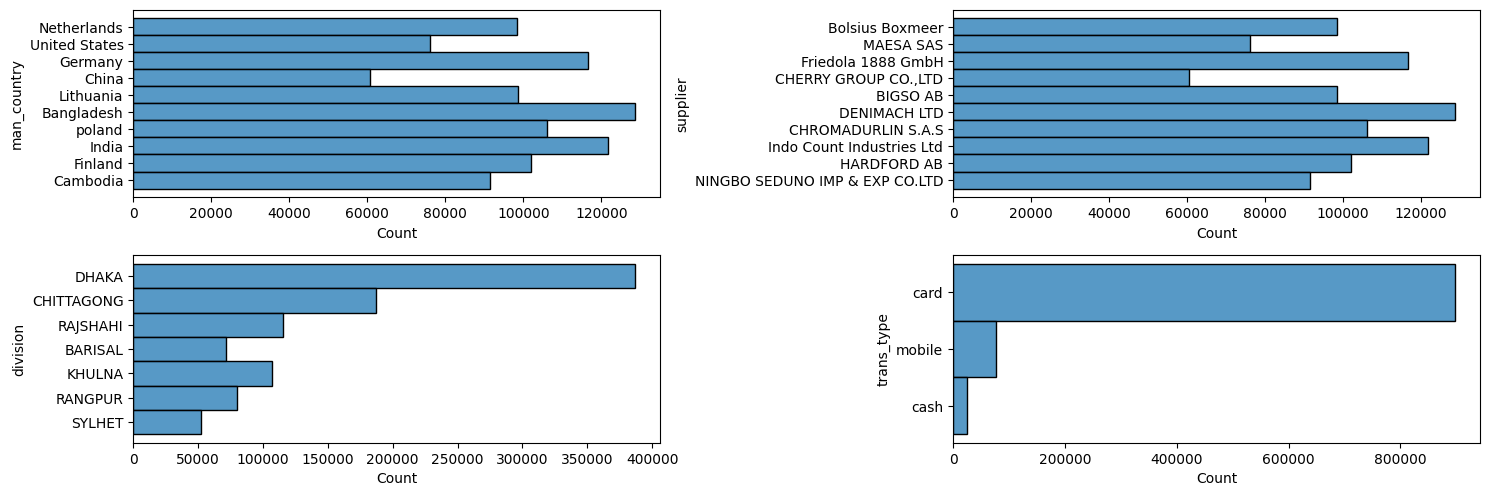

In [196]:
plt.figure(figsize=(15,12))

features = [i for i in check_cats]
for i in range(0, 4):
    plt.subplot(5, 2, i+1)
    sns.histplot(data=df_all, y=features[i])
    plt.tight_layout()

* Pada 3 chart diatas tampak bahwa setiap pemasok mewakili negara tertentu. Ini menunjukkan bahwa e-commerce menjadi tangan pertama dalam penjualan produk

* Pembeli lebih banyak menggunakan kartu bisa diartikan sudah mencatat pengeluaran dengan seksama


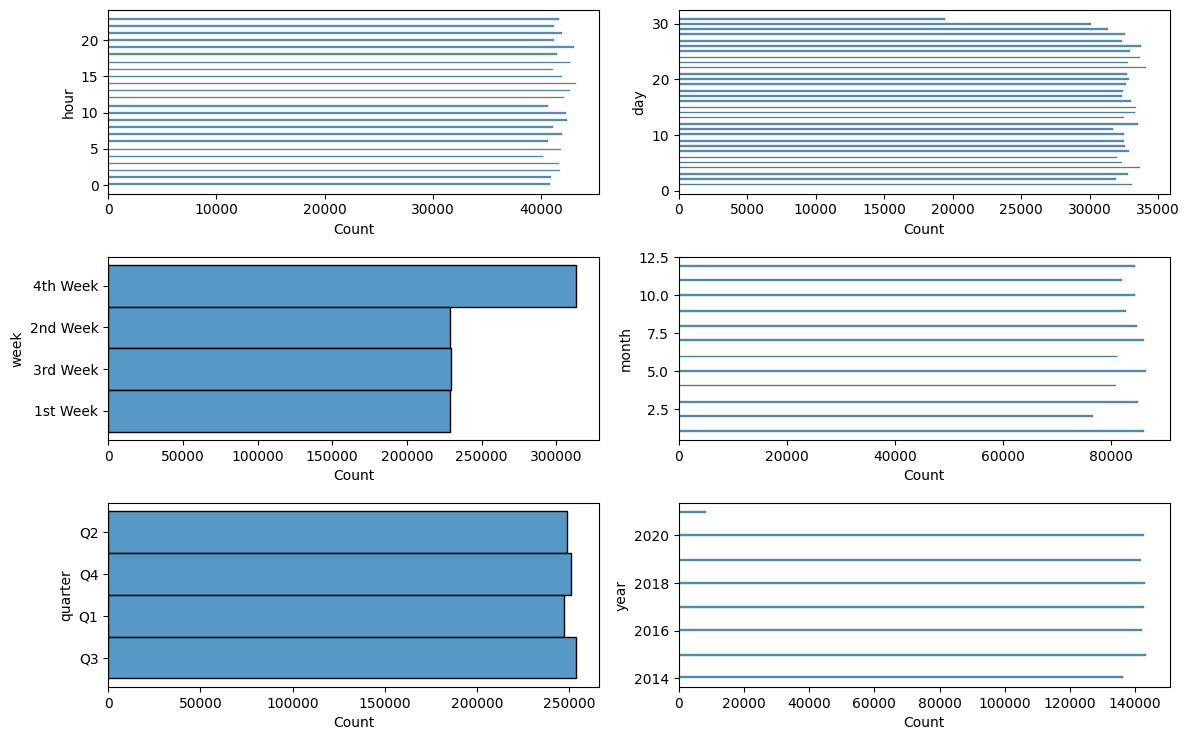

In [197]:
plt.figure(figsize=(12,12))

for i in range(4, len(features)):
    plt.subplot(5, 2, i-3)
    sns.histplot(data=df_all, y=features[i])
    plt.tight_layout()

Chart diatas menunjukkan bahwa transaksi terjadi hampir di sepanjang waktu, dengan penekanan bahwa di akhir bulan, transaksi lebih banyak dari pada waktu lainnya


**Multivariate**

In [198]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 25 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   coustomer_key  1000000 non-null  object        
 1   quantity       1000000 non-null  int64         
 2   unit           996277 non-null   object        
 3   unit_price     1000000 non-null  float64       
 4   total_price    1000000 non-null  float64       
 5   item_name      1000000 non-null  object        
 6   desc           1000000 non-null  object        
 7   man_country    1000000 non-null  object        
 8   supplier       1000000 non-null  object        
 9   division       1000000 non-null  object        
 10  district       1000000 non-null  object        
 11  upazila        1000000 non-null  object        
 12  trans_type     1000000 non-null  object        
 13  bank_name      1000000 non-null  object        
 14  name           997010 non-null   ob

<ipython-input-199-3a30d535c1a6>:10: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



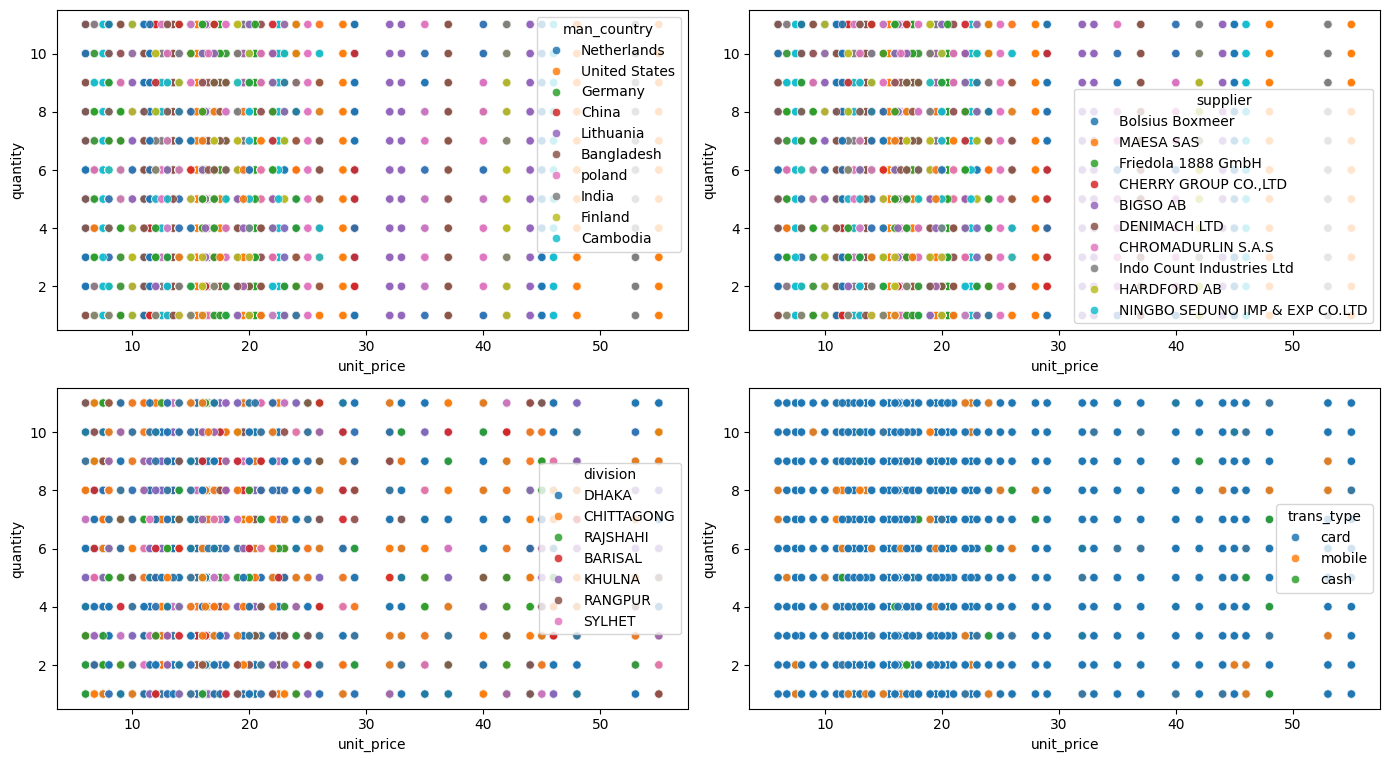

In [199]:
def bivariate_scatter(x, y, hue, df):
    #plt.figure(figsize=(6,6))
    sns.scatterplot(x=x, y=y, data=df, hue=hue, alpha=0.85)

plt.figure(figsize=(14,30))
features = [i for i in check_cats]
for i in range(4):
    plt.subplot(8, 2, i+1)
    bivariate_scatter('unit_price', 'quantity', features[i], df_all)
plt.tight_layout()


Sekali lagi, ini menarik mengapa chartnya rata untuk semua kolom dan tidak tampak yang menonjol


<ipython-input-200-5add0a45bf65>:5: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



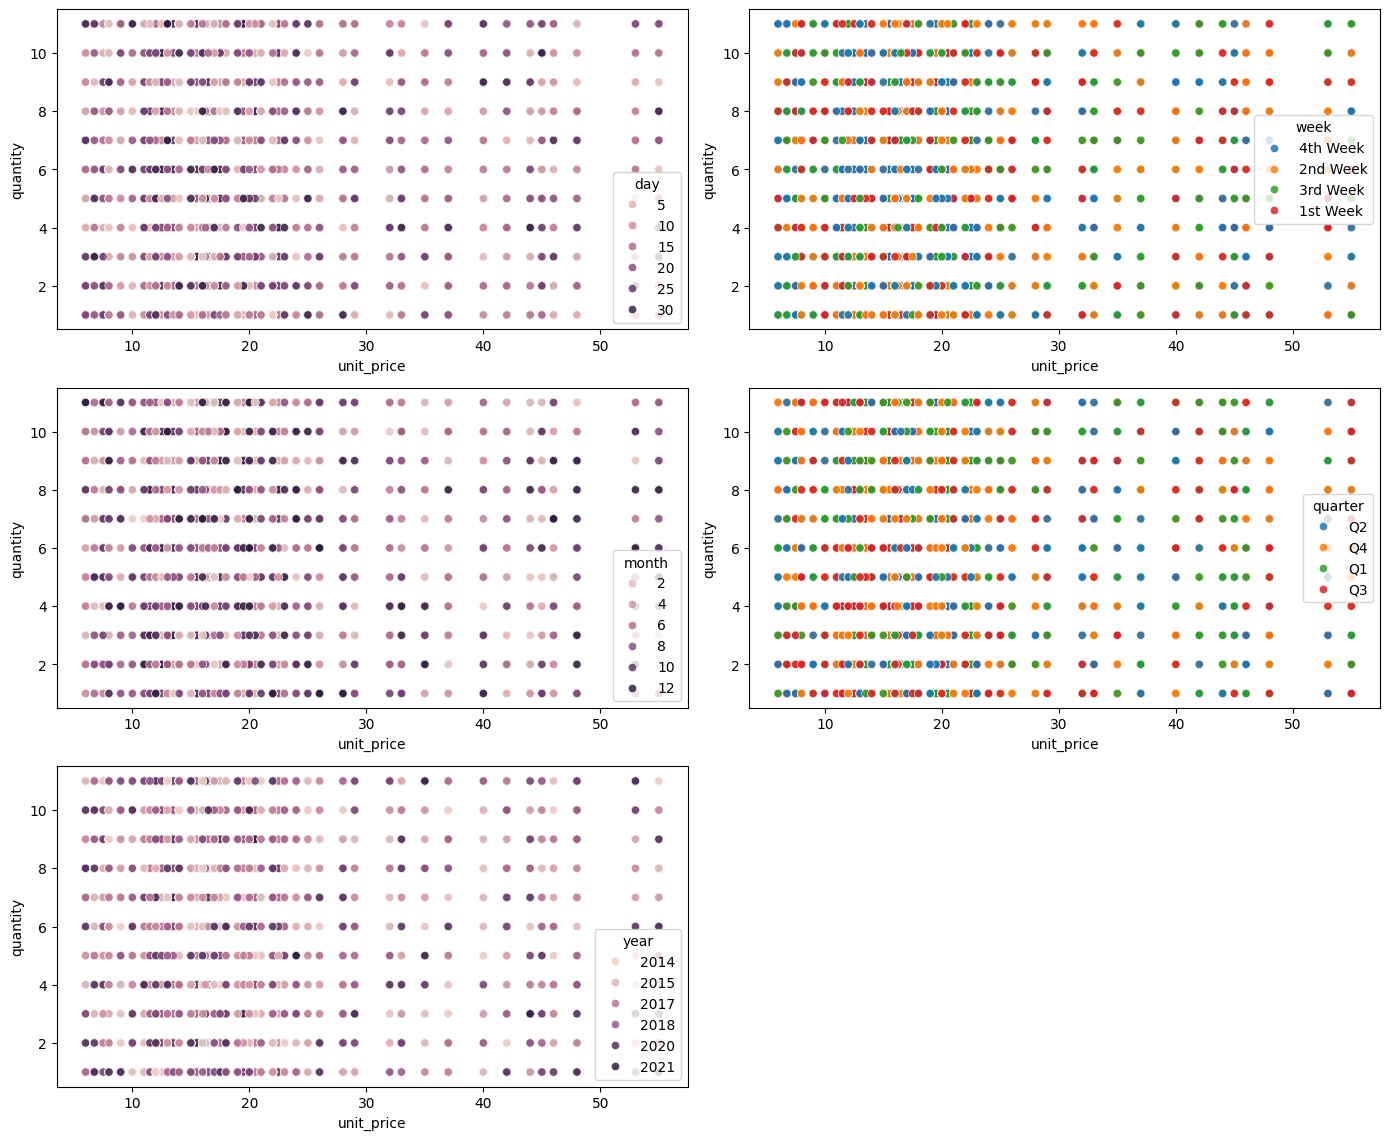

In [200]:
plt.figure(figsize=(14,30))
for i in range(5,len(features)):
    plt.subplot(8, 2, i-4)
    bivariate_scatter('unit_price', 'quantity', features[i], df_all)
plt.tight_layout()

Demikian pula di chart multivariate ini, semuanya rata.


##**RFM Analysis**


In [201]:
max_date = df_all['date_date'].max()
max_date

Timestamp('2021-01-23 04:38:00')

In [202]:
df_recency = df_all.groupby(by='coustomer_key',
                        as_index=False)['date_date'].max()
df_recency.columns = ['coustomer_key', 'LastPurchaseDate']
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(lambda x: (max_date - x).days)
df_recency

,coustomer_key,LastPurchaseDate,Recency
0,C000001,2021-01-12 11:41:00,10
1,C000002,2020-11-22 17:48:00,61
2,C000003,2020-11-02 22:31:00,81
3,C000004,2020-12-21 16:50:00,32
4,C000005,2020-11-23 07:07:00,60
...,...,...,...
9186,C009187,2020-12-26 08:06:00,27
9187,C009188,2020-12-28 07:32:00,25
9188,C009189,2021-01-22 09:59:00,0
9189,C009190,2020-11-30 10:08:00,53


In [203]:
frequency_df = df_all.drop_duplicates().groupby(
    by=['coustomer_key'], as_index=False)['date_date'].count()
frequency_df.columns = ['coustomer_key', 'Frequency']
frequency_df

,coustomer_key,Frequency
0,C000001,82
1,C000002,103
2,C000003,108
3,C000004,118
4,C000005,108
...,...,...
9186,C009187,110
9187,C009188,118
9188,C009189,114
9189,C009190,123


In [204]:
monetary_df = df_all.groupby(by='coustomer_key', as_index=False)['total_price'].sum()
monetary_df.columns = ['coustomer_key', 'Monetary']
monetary_df.head()

,coustomer_key,Monetary
0,C000001,8344.75
1,C000002,11025.50
2,C000003,12120.25
3,C000004,13337.00
4,C000005,10893.25


In [205]:
rf_df = df_recency.merge(frequency_df, on='coustomer_key')
rfm_df = rf_df.merge(monetary_df, on='coustomer_key')
xrfm_df = rfm_df[["Recency", "Frequency", "Monetary"]]
xrfm_df

,Recency,Frequency,Monetary
0,10,82,8344.75
1,61,103,11025.50
2,81,108,12120.25
3,32,118,13337.00
4,60,108,10893.25
...,...,...,...
9186,27,110,11953.75
9187,25,118,13868.75
9188,0,114,11514.50
9189,53,123,12706.25


In [206]:
xrfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9191 entries, 0 to 9190
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    9191 non-null   int64  
 1   Frequency  9191 non-null   int64  
 2   Monetary   9191 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 287.2 KB


In [207]:
xrfm_df.describe()

,Recency,Frequency,Monetary
count,9191.000000,9191.000000,9191.000000
mean,23.205636,108.802089,11467.896393
std,23.280953,10.401206,1375.624517
min,0.000000,73.000000,6986.500000
25%,7.000000,102.000000,10515.875000
50%,16.000000,109.000000,11421.750000
75%,32.000000,116.000000,12367.375000
max,217.000000,156.000000,17104.500000


Bila melihat informasi diatas, bisa disimpulkan bahwa:
* dataset ini hanya memuat transaksi dari pelanggan yang sudah banyak bertransaksi, dimana disini minimal frekuensi transaksinya saja 73 kali, yang artinya bukan pelanggan baru.
* perlu dilihat nanti bagaimana dengan lamanya periode pelanggan bertransaksi di ecommerce. Untuk sementara dilihat dulu dari RFM ini.

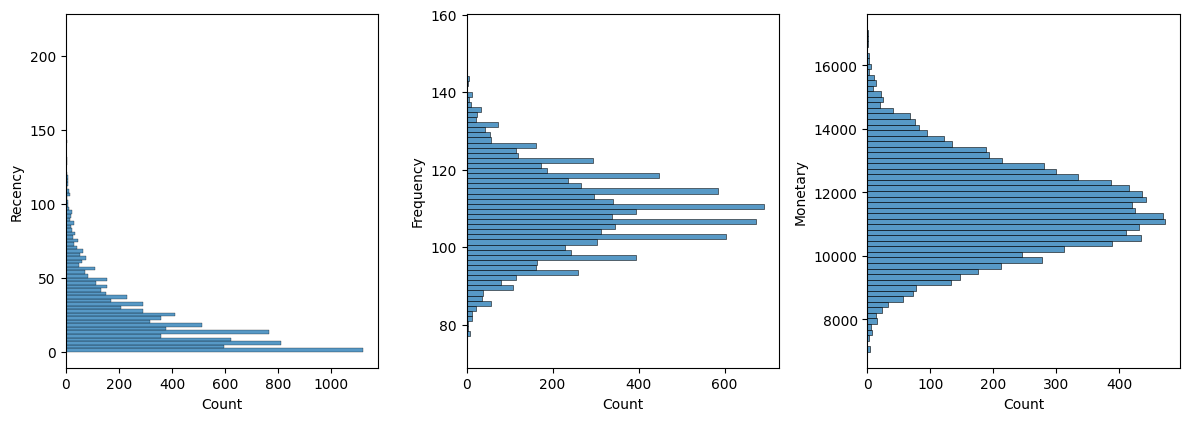

In [208]:
plt.figure(figsize=(12,8))

features = [i for i in xrfm_df.columns]
for i in range(0, len(features)):
    plt.subplot(2, 3, i+1)
    sns.histplot(data=xrfm_df, y=features[i])
    plt.tight_layout()

Chart diatas menunjukkan bahwa:
* konsumen sangat aktif bahwa recency tertingginya hanya 217 hari, bahkan Q2 nya pun di angka 16 hari
* Konsumen sudah terbiasa berbelanja di sini
* Konsumen juga sudah berbelanjua dalam jumlah yang banyak.


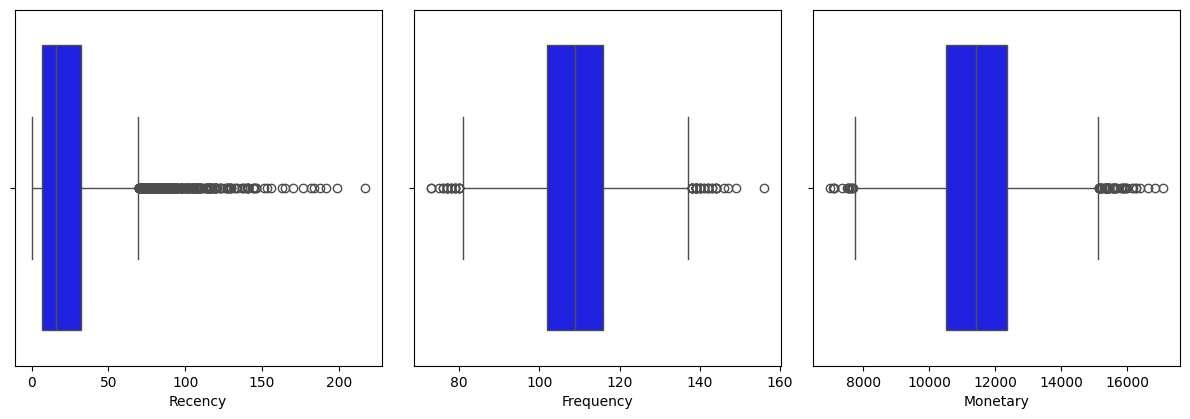

In [209]:
plt.figure(figsize=(12,8))

# plotting
for i in range(0, len(features)):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=xrfm_df[features[i]], color='blue')
    plt.tight_layout()

Chart boxplot memperkuat penjelasan sebelumnya


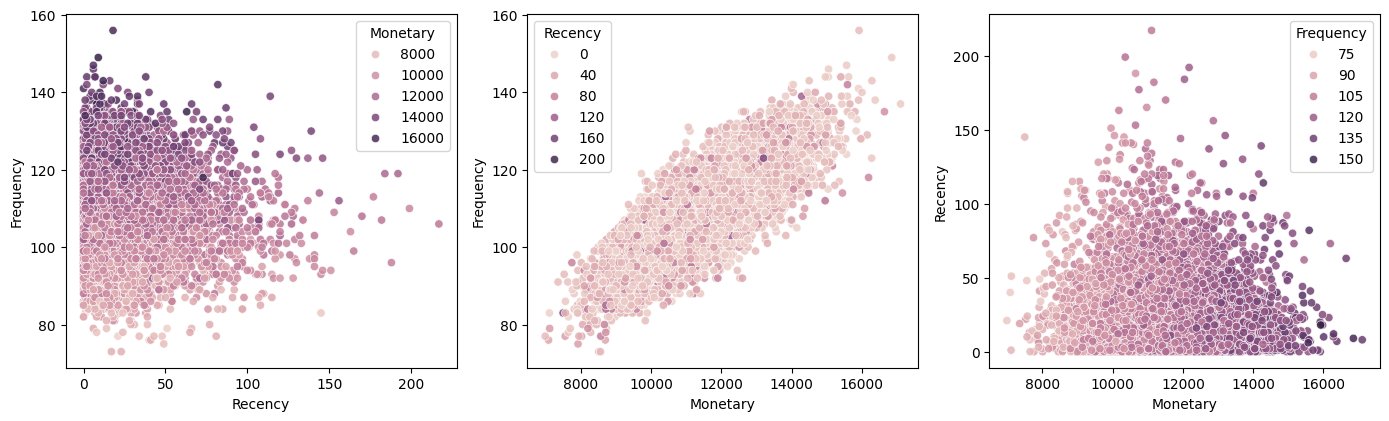

In [210]:
def bivariate_scatter(x, y, hue, df):
    sns.scatterplot(x=x, y=y, data=df, hue=hue, alpha=0.85)

plt.figure(figsize=(14,8))
plt.subplot(2, 3, 1)
bivariate_scatter('Recency', 'Frequency', 'Monetary', xrfm_df)
plt.subplot(2, 3, 2)
bivariate_scatter('Monetary', 'Frequency', 'Recency', xrfm_df)
plt.subplot(2, 3, 3)
bivariate_scatter('Monetary', 'Recency', 'Frequency', xrfm_df)

plt.tight_layout()

Chart diatas ini menunjukkan bahwa konsumen yang memiliki monetary tinggi adalah juga memiliki frequency tinggi. Artinya mereka adalah konsumen setia.


<Axes: >

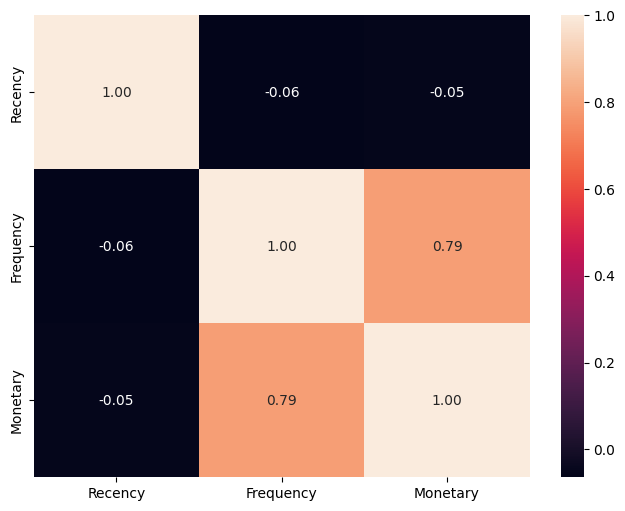

In [211]:
plt.figure(figsize=(8,6))
correlation = xrfm_df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

Korelasi antar kolom menunjukkan bahwa kolom-kolom itu tidak saling tergantung dan aman untuk ke proses clustering


###**RFM Scoring**

In [212]:
xrfm_df["R"] = pd.qcut(xrfm_df["Recency"],5,labels=[5,4,3,2,1])
xrfm_df["F"] = pd.qcut(xrfm_df["Frequency"],5,labels=[1,2,3,4,5])
xrfm_df["M"] = pd.qcut(xrfm_df["Monetary"],5,labels=[1,2,3,4,5])
xrfm_df["RFM_Score"] = xrfm_df["R"].astype(str) +xrfm_df["F"].astype(str) + xrfm_df["M"].astype(str)
xrfm_df

<ipython-input-212-5f622e5fcee8>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Recency,Frequency,Monetary,R,F,M,RFM_Score
0,10,82,8344.75,4,1,1,411
1,61,103,11025.50,1,2,2,122
2,81,108,12120.25,1,3,4,134
3,32,118,13337.00,2,4,5,245
4,60,108,10893.25,1,3,2,132
...,...,...,...,...,...,...,...
9186,27,110,11953.75,2,3,4,234
9187,25,118,13868.75,2,4,5,245
9188,0,114,11514.50,5,4,3,543
9189,53,123,12706.25,1,5,5,155


In [213]:
seg_map = {
    r'1[1-5][1-5]': 'Hibernating',
    r'2[1-5][1-5]': 'Need Attention',
    r'3[1-5][1-5]': 'Loyal Customers',
    r'[4-5][1-3][1-5]': 'Promising',
    r'[4-5][4-5][1-5]': 'Champions'
}

In [216]:
xrfm_order = ['Champions','Promising','Loyal Customers','Need Attention','Hibernating']
xrfm_df['Segment'] = xrfm_df['R'].astype(str) + xrfm_df['F'].astype(str) + xrfm_df['M'].astype(str)
xrfm_df['Segment'] = xrfm_df['Segment'].replace(seg_map, regex=True)
xrfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment
0,10,82,8344.75,4,1,1,411,Promising
1,61,103,11025.50,1,2,2,122,Hibernating
2,81,108,12120.25,1,3,4,134,Hibernating
3,32,118,13337.00,2,4,5,245,Need Attention
4,60,108,10893.25,1,3,2,132,Hibernating


In [217]:
komposisi = xrfm_df.groupby(by='Segment', as_index=False).agg(jumlah=('Segment', 'count'))
komposisi

,Segment,jumlah
0,Champions,1503
1,Hibernating,1816
2,Loyal Customers,1917
3,Need Attention,1752
4,Promising,2203


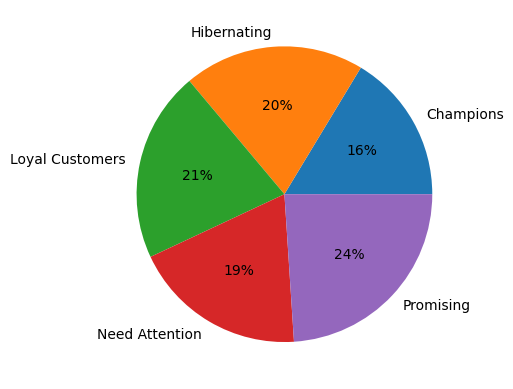

In [218]:
data = komposisi["jumlah"]
labels = komposisi["Segment"]

plt.pie(data, labels = labels, autopct='%.0f%%')
plt.show()

In [219]:
komposisi = xrfm_df.groupby(by=['Segment','RFM_Score'], as_index=False).agg(jumlah=('RFM_Score', 'count'))
komposisi.head()

,Segment,RFM_Score,jumlah
0,Champions,441,6
1,Champions,442,42
2,Champions,443,87
3,Champions,444,148
4,Champions,445,107


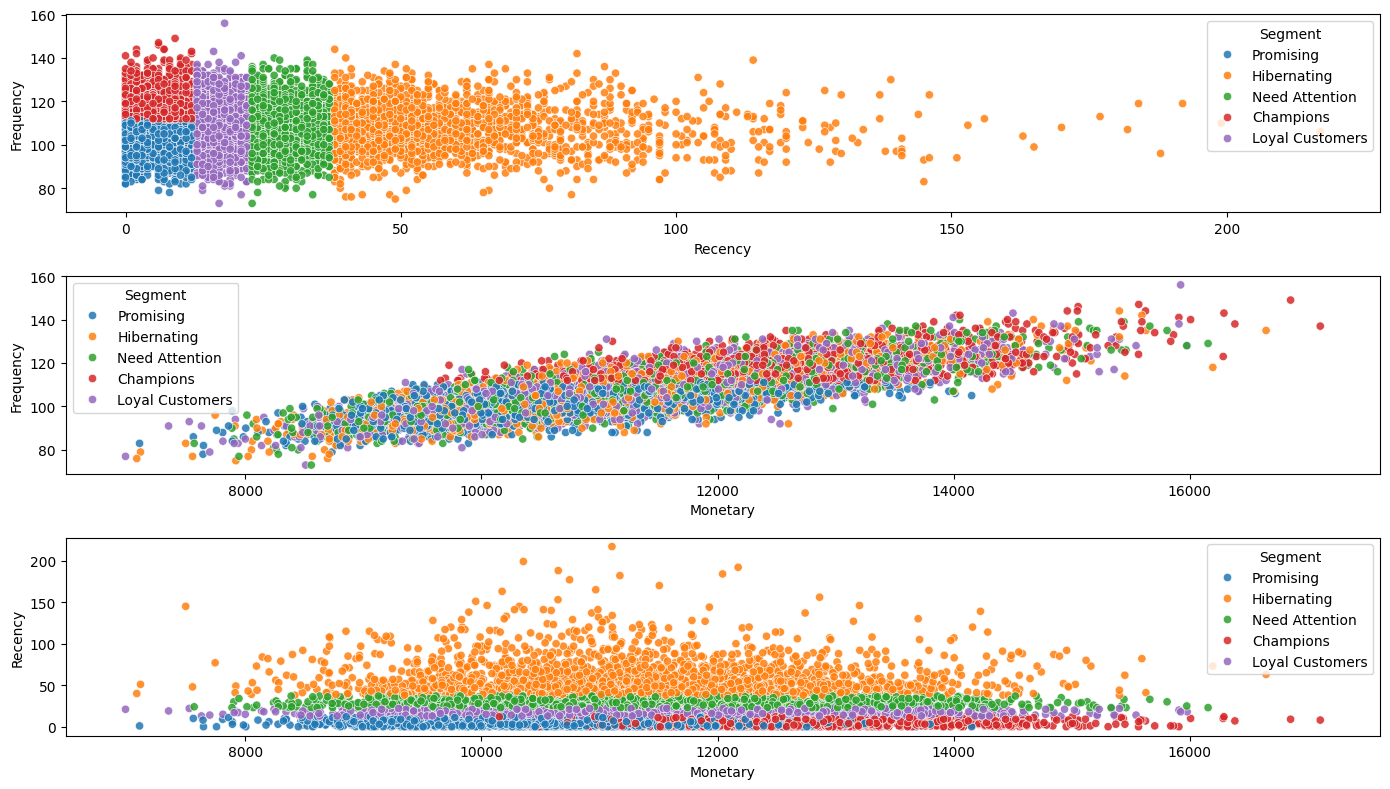

In [220]:
def bivariate_scatter(x, y, hue, df):
    sns.scatterplot(x=x, y=y, data=df, hue=hue, alpha=0.85)

plt.figure(figsize=(14,8))
plt.subplot(3, 1, 1)
bivariate_scatter('Recency', 'Frequency', 'Segment', xrfm_df)
plt.subplot(3, 1, 2)
bivariate_scatter('Monetary', 'Frequency', 'Segment', xrfm_df)
plt.subplot(3, 1, 3)
bivariate_scatter('Monetary', 'Recency', 'Segment', xrfm_df)

plt.tight_layout()

In [221]:
import plotly.express as px

fig = px.scatter_3d(xrfm_df, x='Recency', y='Frequency', z='Monetary',
              color=xrfm_df['Segment'])
fig.show()

###**Insight and recommendation**

Analisa yang dapat diperoleh diantaranya adalah:
1. eCommerce sudah fokus kepada produk yang dibutuhkan pelanggan demikian pula pelanggan juga merupakan pelanggan setia untuk produk-produk tersebut
2. dengan demikian, dari dataset tersebut menunjukkan bahwa cluster dari konsumen ini sudah menjadi satu cluster yang utuh. sudah tidak ada cluster-cluster lagi, kalaupun dipecah, maka tidak tampak lagi garis yang jelas sebagai pembagi cluster.
3. ecommerce ini sangat istimewa dengan produk-produknya sehingga tidak ada satupun pelanggan yang berhenti berbelanja setelah sekali berbelanja. Dari dataset ditemukan bahwa pelanggan minimal telah melakukan 73x transaksi.
4. pelangganpun setia hingga paling minimal bertransaksi dalam periode 2258 hari kalender (6 tahun lebih), dibandingkan data dari tahun 2014-2021 tanpa data tahun 2016 dan 2019.

rekomendasi yang bisa diberikan dari data ini adalah:
* teruskan dengan pola yang sudah dilakukan
* mungkin perlu diperluas dengan produk-produk sejenis lainnya
* mungkin perlu dipromosikan lebih luas lagi untuk menambah pelanggan baru
* ecommerce ini telah memiliki ciri khasnya sehingga memiliki banyak pelanggan yang sedemikian setia.